In [15]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [19]:
train_df.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

<Axes: >

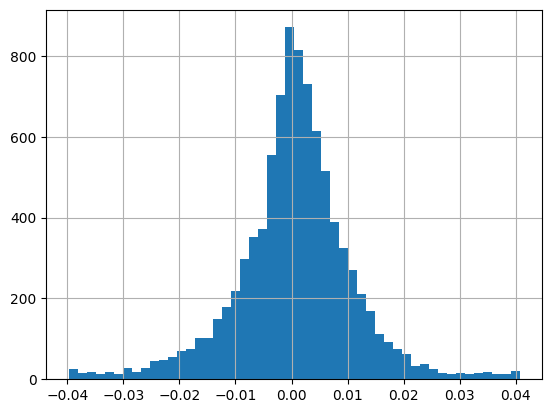

In [12]:
train_df['forward_returns'].hist(bins=50)

#### customized features/targets (C)
C1: within 3 std (0); larger than mean+3std (+1); smaller than mean-3std (-1)

In [20]:
mean = train_df['forward_returns'].mean()
std = train_df['forward_returns'].std()

train_df['C1'] = np.where(
    train_df['forward_returns'] > mean + 3*std,  1,
    np.where(train_df['forward_returns'] < mean - 3*std, -1, 0)
)

In [23]:
train_df['C1'].value_counts()

C1
 0    8810
-1      94
 1      86
Name: count, dtype: int64

#### Train a categorization model that is able to predict C1